# Getting started with prtecan

In [1]:
import hashlib
import os
import warnings

import arviz as az
import lmfit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from clophfit import prtecan
from clophfit.binding import fitting, plotting
from clophfit.prtecan import Titration, TitrationAnalysis

%load_ext autoreload
%autoreload 2

os.chdir("../../tests/Tecan/140220/")

## Parsing a Single Tecan File

A Tecan file comprises of multiple label blocks, each with its unique metadata. This metadata provides critical details and context for the associated label block. In addition, the Tecan file itself also has its overarching metadata that describes its overall content.

When the KEYS for label blocks are identical, it indicates that these label blocks are equivalent - meaning, they contain the same measurements. The equality of KEYS plays a significant role in parsing and analyzing Tecan files, as it assists in identifying and grouping similar measurement sets together. This understanding of label block equivalence based on KEY similarity is critical when working with Tecan files.

In [2]:
tf = prtecan.Tecanfile("../290212_6.38.xls")
lb0 = tf.labelblocks[0]
tf.metadata

{'Device: infinite 200': Metadata(value='Serial number: 810002712', unit=['Serial number of connected stacker:']),
 'Firmware: V_2.11_04/08_InfiniTe (Apr  4 2008/14.37.11)': Metadata(value='MAI, V_2.11_04/08_InfiniTe (Apr  4 2008/14.37.11)', unit=None),
 'Date:': Metadata(value='29/02/2012', unit=None),
 'Time:': Metadata(value='15.57.05', unit=None),
 'System': Metadata(value='TECANROBOT', unit=None),
 'User': Metadata(value='TECANROBOT\\Administrator', unit=None),
 'Plate': Metadata(value='PE 96 Flat Bottom White   [PE.pdfx]', unit=None),
 'Plate-ID (Stacker)': Metadata(value='Plate-ID (Stacker)', unit=None),
 'Shaking (Linear) Duration:': Metadata(value=50, unit=['s']),
 'Shaking (Linear) Amplitude:': Metadata(value=2, unit=['mm'])}

In [3]:
lb0.metadata

{'Label': Metadata(value='Label1', unit=None),
 'Mode': Metadata(value='Fluorescence Top Reading', unit=None),
 'Excitation Wavelength': Metadata(value=400, unit=['nm']),
 'Emission Wavelength': Metadata(value=535, unit=['nm']),
 'Excitation Bandwidth': Metadata(value=20, unit=['nm']),
 'Emission Bandwidth': Metadata(value=25, unit=['nm']),
 'Gain': Metadata(value=81, unit=['Manual']),
 'Number of Flashes': Metadata(value=10, unit=None),
 'Integration Time': Metadata(value=20, unit=['µs']),
 'Lag Time': Metadata(value='µs', unit=None),
 'Settle Time': Metadata(value='ms', unit=None),
 'Start Time:': Metadata(value='29/02/2012 15.57.55', unit=None),
 'Temperature': Metadata(value=26.0, unit=['°C']),
 'End Time:': Metadata(value='29/02/2012 15.58.35', unit=None)}

In [4]:
print(lb0.data)

{'A01': 30072.0, 'A02': 27276.0, 'A03': 22249.0, 'A04': 30916.0, 'A05': 27943.0, 'A06': 25130.0, 'A07': 26765.0, 'A08': 27836.0, 'A09': 23084.0, 'A10': 31370.0, 'A11': 16890.0, 'A12': 22136.0, 'B01': 22336.0, 'B02': 31327.0, 'B03': 24855.0, 'B04': 32426.0, 'B05': 30066.0, 'B06': 27018.0, 'B07': 28269.0, 'B08': 27570.0, 'B09': 31310.0, 'B10': 24358.0, 'B11': 22595.0, 'B12': 20355.0, 'C01': 23232.0, 'C02': 32241.0, 'C03': 28309.0, 'C04': 26642.0, 'C05': 28818.0, 'C06': 26638.0, 'C07': 26423.0, 'C08': 29441.0, 'C09': 28541.0, 'C10': 29656.0, 'C11': 29841.0, 'C12': 25738.0, 'D01': 26578.0, 'D02': 22280.0, 'D03': 36219.0, 'D04': 25735.0, 'D05': 35433.0, 'D06': 27376.0, 'D07': 22497.0, 'D08': 35681.0, 'D09': 26154.0, 'D10': 32311.0, 'D11': 27495.0, 'D12': 22459.0, 'E01': 27576.0, 'E02': 26058.0, 'E03': 28882.0, 'E04': 26188.0, 'E05': 27531.0, 'E06': 31269.0, 'E07': 26757.0, 'E08': 26427.0, 'E09': 27764.0, 'E10': 27184.0, 'E11': 26556.0, 'E12': 18494.0, 'F01': 22120.0, 'F02': 26642.0, 'F03': 

## Group a list of tecan files into a titration

The command Titration.fromlistfile("../listfile") reads a list of Tecan files, identifies unique measurements in each file, groups matching ones, and combines them into a titration set for further analysis.

In [5]:
tit = Titration.fromlistfile("../list.pH")
tit.conc

[5.78, 6.38, 6.83, 7.24, 7.67, 8.23, 8.82, 9.31]

In [6]:
lbg0 = tit.labelblocksgroups[0]
lbg1 = tit.labelblocksgroups[1]
lbg0.metadata, lbg1.metadata

({'Label': Metadata(value='Label1', unit=None),
  'Mode': Metadata(value='Fluorescence Top Reading', unit=None),
  'Excitation Wavelength': Metadata(value=400, unit=['nm']),
  'Emission Wavelength': Metadata(value=535, unit=['nm']),
  'Excitation Bandwidth': Metadata(value=20, unit=['nm']),
  'Emission Bandwidth': Metadata(value=25, unit=['nm']),
  'Number of Flashes': Metadata(value=10, unit=None),
  'Integration Time': Metadata(value=20, unit=['µs']),
  'Lag Time': Metadata(value='µs', unit=None),
  'Settle Time': Metadata(value='ms', unit=None),
  'Gain': Metadata(value=81, unit=None)},
 {'Label': Metadata(value='Label2', unit=None),
  'Mode': Metadata(value='Fluorescence Top Reading', unit=None),
  'Excitation Wavelength': Metadata(value=485, unit=['nm']),
  'Emission Wavelength': Metadata(value=535, unit=['nm']),
  'Excitation Bandwidth': Metadata(value=25, unit=['nm']),
  'Emission Bandwidth': Metadata(value=25, unit=['nm']),
  'Number of Flashes': Metadata(value=10, unit=None),


In [7]:
lbg0.labelblocks[5].metadata["Temperature"]

Metadata(value=25.6, unit=['°C'])

In [8]:
lbg0.data["A01"], lbg0.data["H12"]

([30344.0, 30072.0, 31010.0, 32678.0, 33731.0, 36506.0, 37967.0, 37725.0],
 [21287.0, 20888.0, 21209.0, 21711.0, 22625.0, 23397.0, 24791.0, 25045.0])

## pH titration analysis

PlateScheme(file='./scheme.txt', _buffer=['D01', 'E01', 'D12', 'E12'], _ctrl=['B01', 'A12', 'C01', 'H12', 'G12', 'F01', 'B12', 'H01', 'C12', 'F12', 'G01', 'A01'], _names={'G03': {'H12', 'B12', 'A01'}, 'NTT': {'C12', 'F01', 'F12'}, 'S202N': {'G12', 'H01', 'C01'}, 'V224Q': {'B01', 'G01', 'A12'}})

Additions = [100, 2, 2, 2, 2, 2, 2].



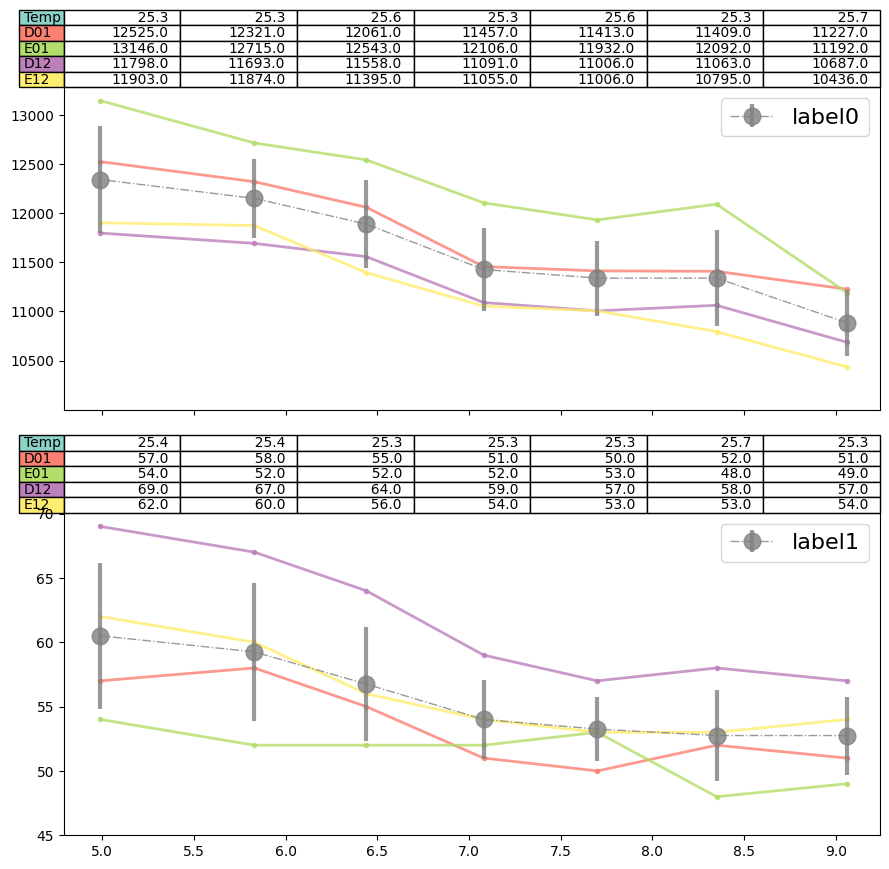

In [9]:
warnings.filterwarnings("ignore", category=UserWarning, module="clophfit.prtecan")

ph_an = TitrationAnalysis.fromlistfile("./list.pH")
ph_an.load_scheme("./scheme.txt")
print(ph_an.scheme)
ph_an.load_additions("additions.pH")
print(f"\nAdditions = {ph_an.additions}.\n")
g = ph_an.plot_buffer()

### Reassign Buffer Wells

In the ClopHfit.prtecan module, you can reassess buffer wells, updating the data to account for any dilution (additions) and subtracting the updated buffer value. This is a handy feature that gives you more control over your analysis.

For instance, consider the following data for a particular well:

In [10]:
print(ph_an.labelblocksgroups[1].data["D01"])
print(ph_an.data[1]["D01"])

[51.0, 52.0, 50.0, 51.0, 55.0, 58.0, 57.0]
[-1.75, -0.765, -3.38, -3.18, -1.8900000000000001, -1.375, -3.9200000000000004]


You can reassign buffer wells using the `buffer_wells` attribute:

In [11]:
ph_an.buffer_wells = ["D01", "E01"]

This updates the data for the specified wells, correcting for dilution and subtracting the buffer value:

In [12]:
print(ph_an.labelblocksgroups[1].data["D01"])
print(ph_an.data[1]["D01"])

[51.0, 52.0, 50.0, 51.0, 55.0, 58.0, 57.0]
[1.0, 2.04, -1.56, -0.53, 1.62, 3.3000000000000003, 1.6800000000000002]


The original data remains unchanged in `labelblocksgroups` while the adjusted data is available in `data`, providing a clear and accurate reflection of the process.

### Fitting

In [13]:
ph_an.data[1]["A01"]

[4649.0,
 3785.2200000000003,
 2060.76,
 830.51,
 474.66,
 321.20000000000005,
 259.28000000000003]

In [14]:
ph_an.labelblocksgroups[1].data_buffersubtracted["A01"]

[4649.0, 3711.0, 1981.5, 783.5, 439.5, 292.0, 231.5]

In [15]:
# ph_an.datafit_params = {"bg": True}

In [16]:
ph_an.datafit[1]["E06"]

[9268.0, 7091.0, 3372.0, 1415.0, 793.0, 618.0, 345.0]

In [17]:
ph_an.fit("pH")
ph_an.fittings[1]

,ss,msg,df,tval,chisqr,K,SA,SB,sK,sSA,sSB,ctrl
H03,1,Both actual and predicted relative reductions ...,4,2.776445,2315.624914,7.984979,605.730019,10917.574702,0.028963,76.037011,169.667436,NaN
D02,1,Both actual and predicted relative reductions ...,4,2.776445,9397.974038,7.017346,680.510795,4592.657252,0.133984,206.335639,197.438471,NaN
C12,1,Both actual and predicted relative reductions ...,4,2.776445,1134.561624,7.576295,354.043527,2524.990943,0.086689,59.086336,89.063816,NTT
D07,1,Both actual and predicted relative reductions ...,4,2.776445,902.308478,8.015098,270.135527,4835.200602,0.041302,47.139508,108.736464,NaN
C05,1,Both actual and predicted relative reductions ...,4,2.776445,15734.370825,6.951595,1038.152336,8242.651727,0.094388,274.566813,249.292706,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
A10,1,Both actual and predicted relative reductions ...,4,2.776445,20279.530259,7.033038,1119.884631,7025.032888,0.130334,301.139633,291.774056,NaN
G06,1,Both actual and predicted relative reductions ...,4,2.776445,503.991987,7.981080,136.433306,2025.124390,0.073667,35.505160,78.889724,NaN
B03,1,Both actual and predicted relative reductions ...,4,2.776445,10448.806742,6.895277,857.241503,5872.418044,0.110830,229.419603,199.075107,NaN
H04,1,Both actual and predicted relative reductions ...,4,2.776445,304.643650,7.987042,338.712763,5263.972091,0.022011,27.566491,61.650019,NaN


In [18]:
set(ph_an.__dict__.keys()) - set(tit.__dict__.keys())

{'_datafit', '_datafit_params', '_scheme', 'fittings', 'fz', 'keys_unk'}

In [19]:
well = "E06"
y0 = np.array(ph_an.data[0][well])
y1 = np.array(ph_an.labelblocksgroups[1].data_buffersubtracted_norm[well])
# y1 = np.array(ph_an.data[1][well])
x = np.array(ph_an.conc)
ds = fitting.Dataset(x, {"y1": y1}, is_ph=True)
rfit = fitting.fit_binding_glob(ds)
rfit.result.params

name,value,standard error,relative error,initial value,min,max,vary
S0_y1,904.018066,15.5382485,(1.72%),823.0357142857143,0.00000000,inf,True
S1_y1,36.8288651,6.52404589,(17.71%),25.84821428571429,-inf,inf,True
K,8.04354415,0.03062166,(0.38%),7.7,3.00000000,11.0000000,True


In [20]:
remcee = rfit.mini.emcee(burn=50, steps=500, workers=8, thin=10)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 500/500 [00:06<00:00, 78.64it/s]


The chain is shorter than 50 times the integrated autocorrelation time for 3 parameter(s). Use this estimate with caution and run a longer chain!
N/50 = 10;
tau: [40.08844447 31.72626474 38.84558745]


[8.0, 8.09]


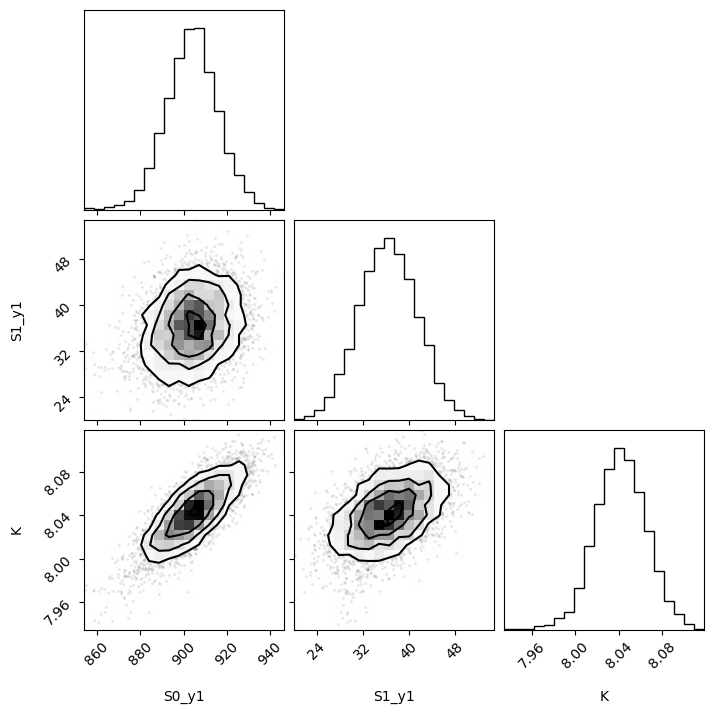

In [21]:
f, hdi = plotting.plot_emcee(remcee)
print(hdi)

Value at which the probability of being higher is 99%: 7.995429980414403


array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

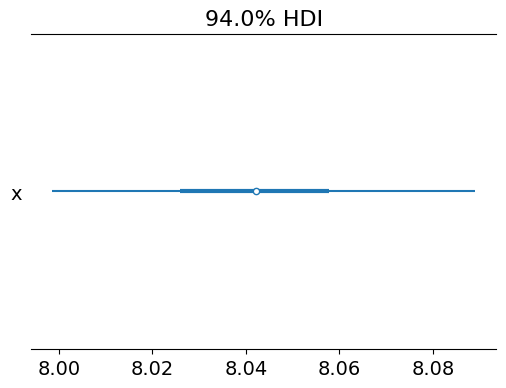

In [22]:
samples = remcee.flatchain[["K"]]
# Convert the dictionary of flatchains to an ArviZ InferenceData object
samples_dict = {key: np.array(val) for key, val in samples.items()}
idata = az.from_dict(posterior=samples_dict)
k_samples = idata.posterior["K"].values
percentile_value = np.percentile(k_samples, 3)
print(f"Value at which the probability of being higher is 99%: {percentile_value}")

az.plot_forest(k_samples)

## Cl titration analysis

In [23]:
cl_an = prtecan.TitrationAnalysis.fromlistfile("list.cl")
cl_an.load_scheme("scheme.txt")
cl_an.scheme

PlateScheme(file='scheme.txt', _buffer=['D01', 'E01', 'D12', 'E12'], _ctrl=['B01', 'A12', 'C01', 'H12', 'G12', 'F01', 'B12', 'H01', 'C12', 'F12', 'G01', 'A01'], _names={'G03': {'H12', 'B12', 'A01'}, 'NTT': {'C12', 'F01', 'F12'}, 'S202N': {'G12', 'H01', 'C01'}, 'V224Q': {'B01', 'G01', 'A12'}})

In [24]:
cl_an.load_additions("additions.cl")
print(cl_an.conc)
cl_an.conc = prtecan.calculate_conc(cl_an.additions, 1000)
cl_an.conc

[0, 0, 0, 0, 0, 0, 0, 0, 0]


array([  0.        ,  17.54385965,  34.48275862,  50.84745763,
        66.66666667,  81.96721311,  96.77419355, 138.46153846,
       164.17910448])

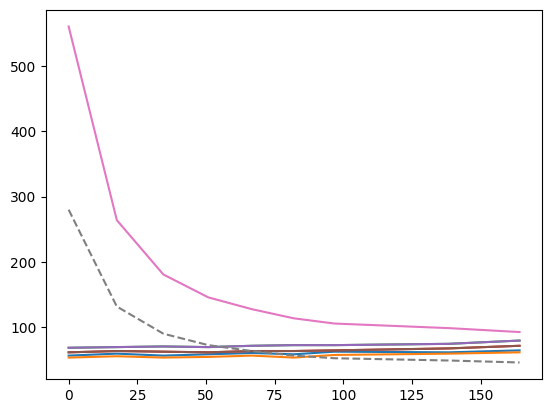

In [25]:
lbg = cl_an.labelblocksgroups[1]
x = cl_an.conc
plt.plot(x, lbg.data["D01"])
plt.plot(x, lbg.data["E01"])
plt.plot(x, lbg.data["D12"])
plt.plot(x, lbg.data["E12"])
plt.plot(x, cl_an.labelblocksgroups[1].data["D12"])
plt.plot(x, cl_an.labelblocksgroups[1].data["E12"])
plt.plot(x, lbg.data["A11"])
plt.plot(x, np.array(cl_an.labelblocksgroups[1].data["A11"]) / 2, "--")

In [26]:
lbg.labelblocks[1].buffer

62.5

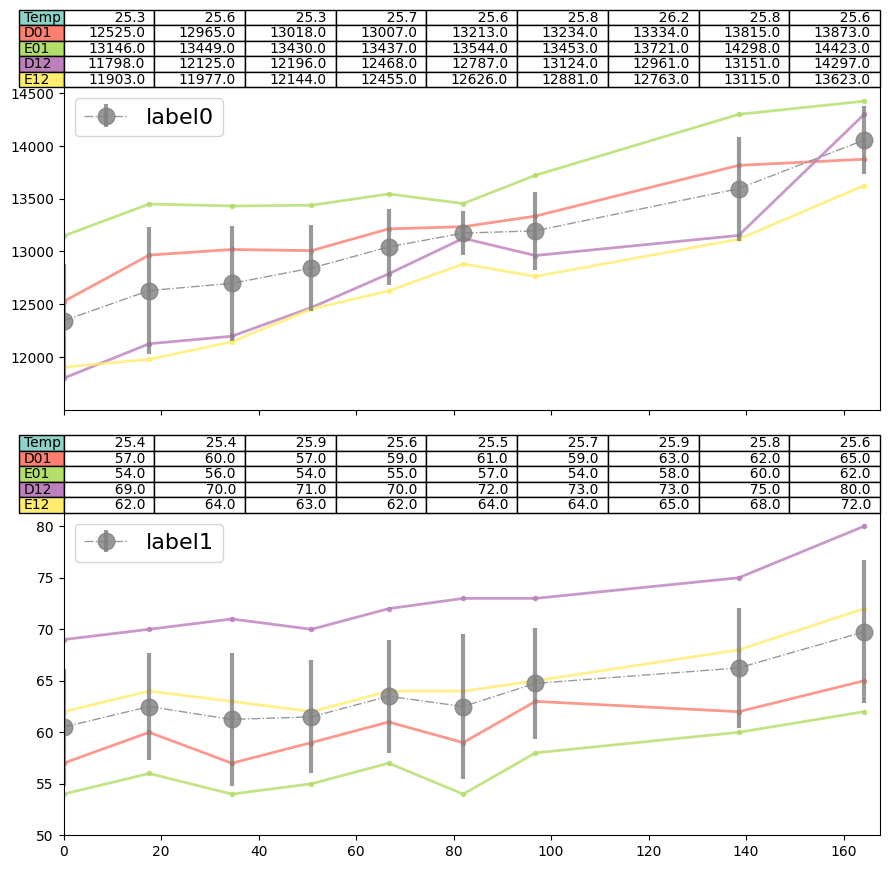

In [27]:
f = cl_an.plot_buffer()

## Fitting

TitrationAnalysis class need API changes to better rationalize its use.

In [28]:
ph_an.fit("pH", fin=-1, tval=0.95)
type(ph_an.fittings)

list

In [29]:
# ph_an.fittings[1].to_csv('fit1-1.csv')
ph_an.fittings[1]

,ss,msg,df,tval,chisqr,K,SA,SB,sK,sSA,sSB,ctrl
H03,1,Both actual and predicted relative reductions ...,3,3.182446,1370.695036,7.989970,633.763191,10929.751632,0.026904,81.226510,151.596802,NaN
D02,1,Both actual and predicted relative reductions ...,3,3.182446,8437.666872,7.053734,775.083741,4609.124273,0.171607,322.124570,220.423733,NaN
C12,1,Both actual and predicted relative reductions ...,3,3.182446,161.541703,7.600610,386.210819,2533.775381,0.040884,32.361203,39.422077,NTT
D07,1,Both actual and predicted relative reductions ...,3,3.182446,658.838957,8.021292,285.574231,4842.000361,0.042589,55.736547,108.036812,NaN
C05,1,Both actual and predicted relative reductions ...,3,3.182446,10030.127585,6.983478,1200.024867,8266.546672,0.103420,371.646550,234.265124,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
A10,1,Both actual and predicted relative reductions ...,3,3.182446,6757.309201,7.083646,1321.140867,7058.949989,0.101935,281.826515,199.505273,NaN
G06,1,Both actual and predicted relative reductions ...,3,3.182446,357.426982,7.992324,148.321611,2029.996914,0.075232,41.445915,77.571128,NaN
B03,1,Both actual and predicted relative reductions ...,3,3.182446,11690.175749,6.918480,938.284986,5884.540729,0.162870,424.743225,247.297073,NaN
H04,1,Both actual and predicted relative reductions ...,3,3.182446,269.898443,7.989994,346.613030,5267.423556,0.024980,36.043251,67.271203,NaN


In [30]:
ph_an.fittings[1].loc[["H06", "A01"]]

,ss,msg,df,tval,chisqr,K,SA,SB,sK,sSA,sSB,ctrl
H06,1,Both actual and predicted relative reductions ...,3,3.182446,85.730623,8.044499,583.667709,9807.482415,0.007650,19.955025,39.796818,NaN
A01,1,Both actual and predicted relative reductions ...,3,3.182446,1912.411207,7.939952,308.491030,5053.296317,0.067897,97.573993,171.649842,G03


In [31]:
key = "H06"
lbg = ph_an.labelblocksgroups[1]
x = ph_an.conc
y = lbg.data[key]
dd = prtecan.prtecan.fit_titration("pH", x[:-1], y[:-1])
dd

,ss,msg,df,tval,chisqr,K,SA,SB,sK,sSA,sSB
0,1,Both actual and predicted relative reductions ...,3,3.182446,85.730623,8.044499,583.667709,9807.482415,0.00765,19.955025,39.796818


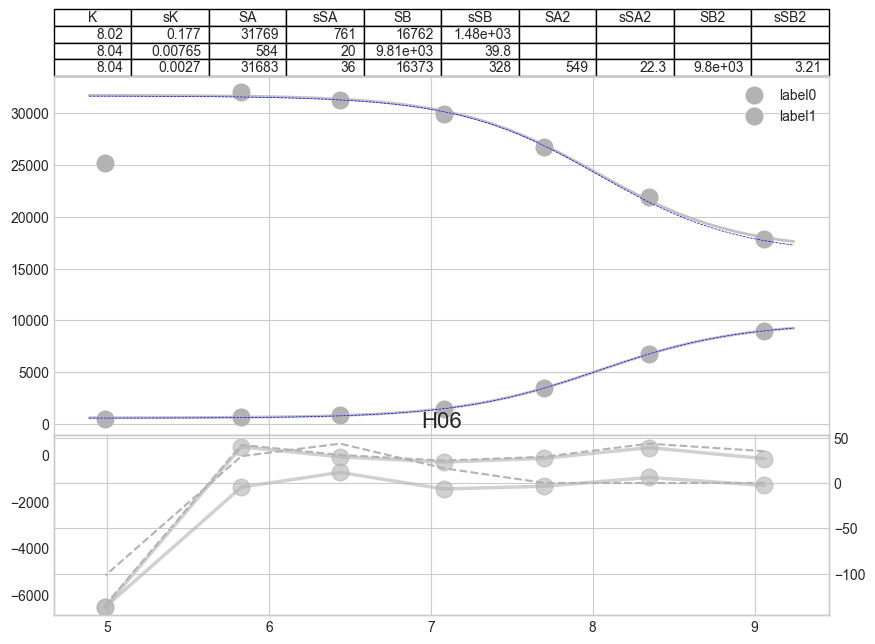

In [32]:
ph_an.plot_well("H06")

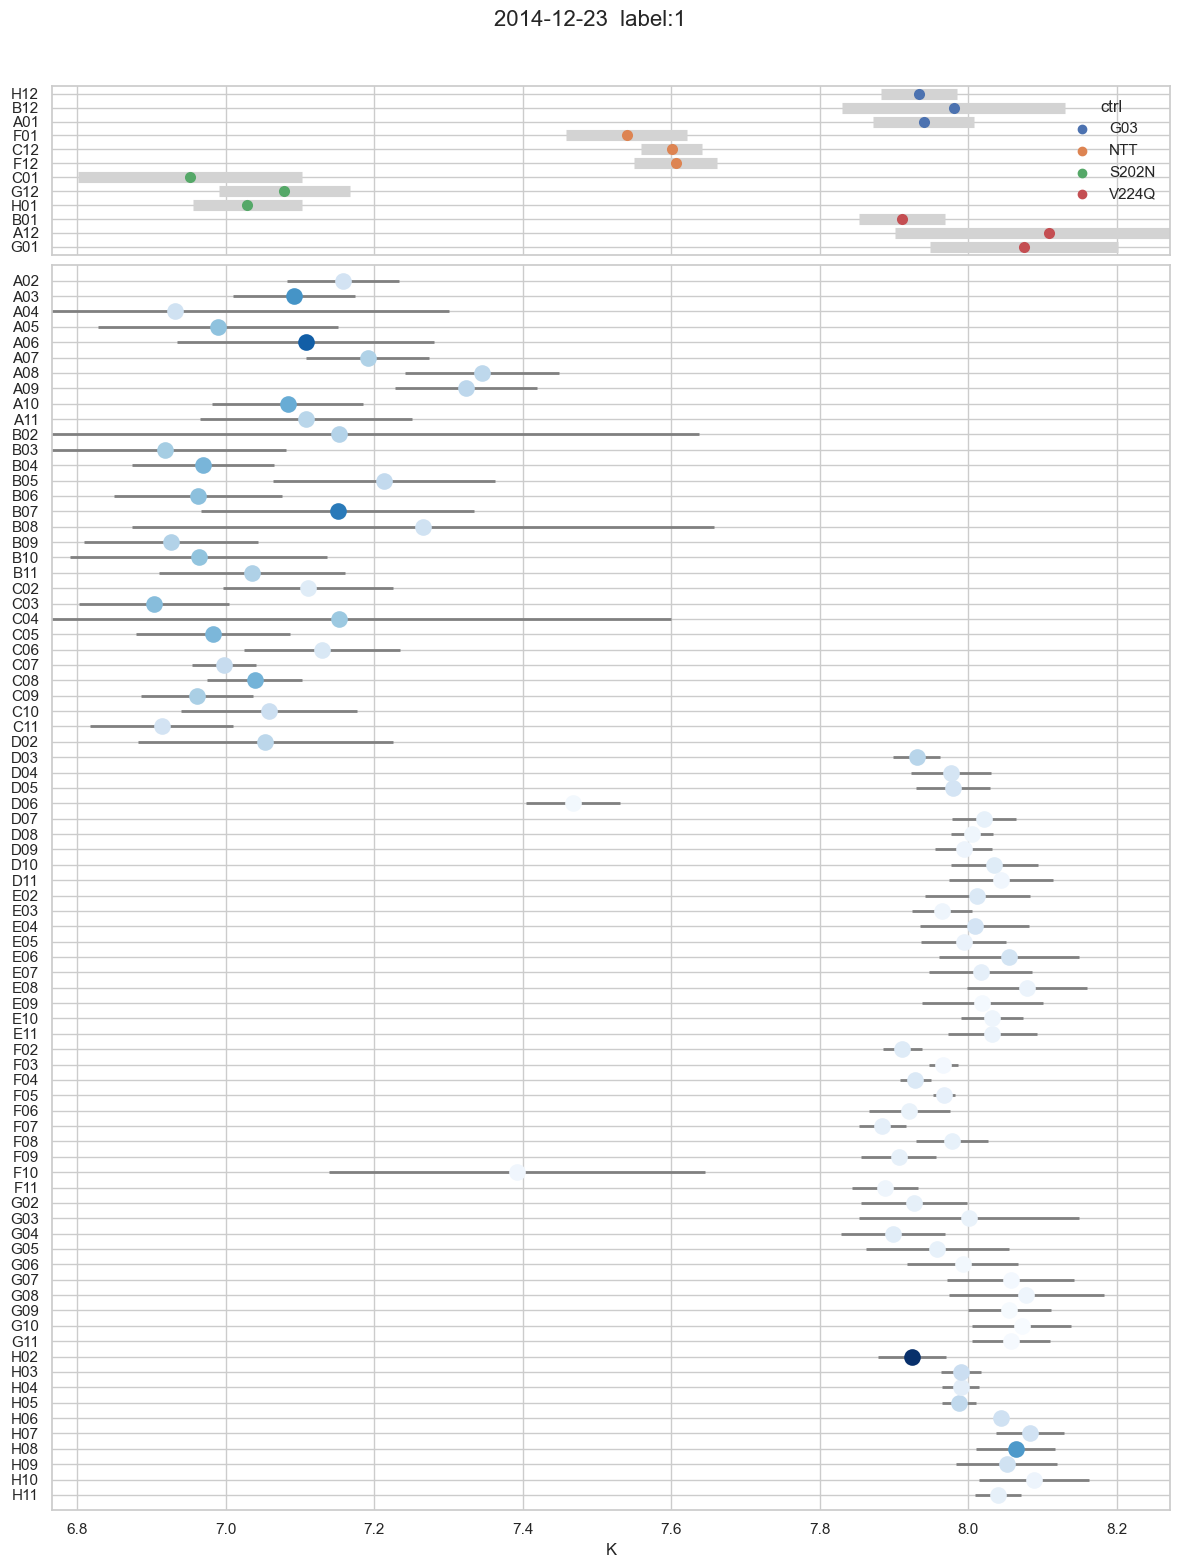

In [33]:
f = ph_an.plot_k(1, title="2014-12-23")

In [34]:
cl_an.fit("Cl", fin=None)

In [35]:
cl_an.plot_all_wells("cl.pdf")

In [36]:
ph_an.print_fitting(2)

          K      sK      SA     sSA      SB     sSB     SA2    sSA2     SB2    sSB2
  G03
H12    7.71    0.02   23432     236   14741      11     353      81    5584     146 
B12    8.15    0.03   18666      77   14000      33     522    1640    2845     331 
A01    8.12    0.07   22500     318   13976     400     624     277    5215     257 
  NTT
F01    7.64    0.04   47972      33   23856     375    1573    1038    7997      54 
C12    7.80    0.11   22069     648   14721     575     957     294    2554      26 
F12    7.72    0.09   23474     567   15716     613     586     253    2842      55 
  S202N
C01    7.39    0.30   43803     220   30991    1494    3709    2136    7038     390 
G12    7.34    0.15   22702     346   16628     178     817     189    2384     141 
H01    7.15    0.00   36727       0   24994       8    1197    1081    5148      14 
  V224Q
B01    8.00    0.03   40086     263   23554     346    1523     900   15426      91 
A12    8.41    0.01   28827      53   

### selection

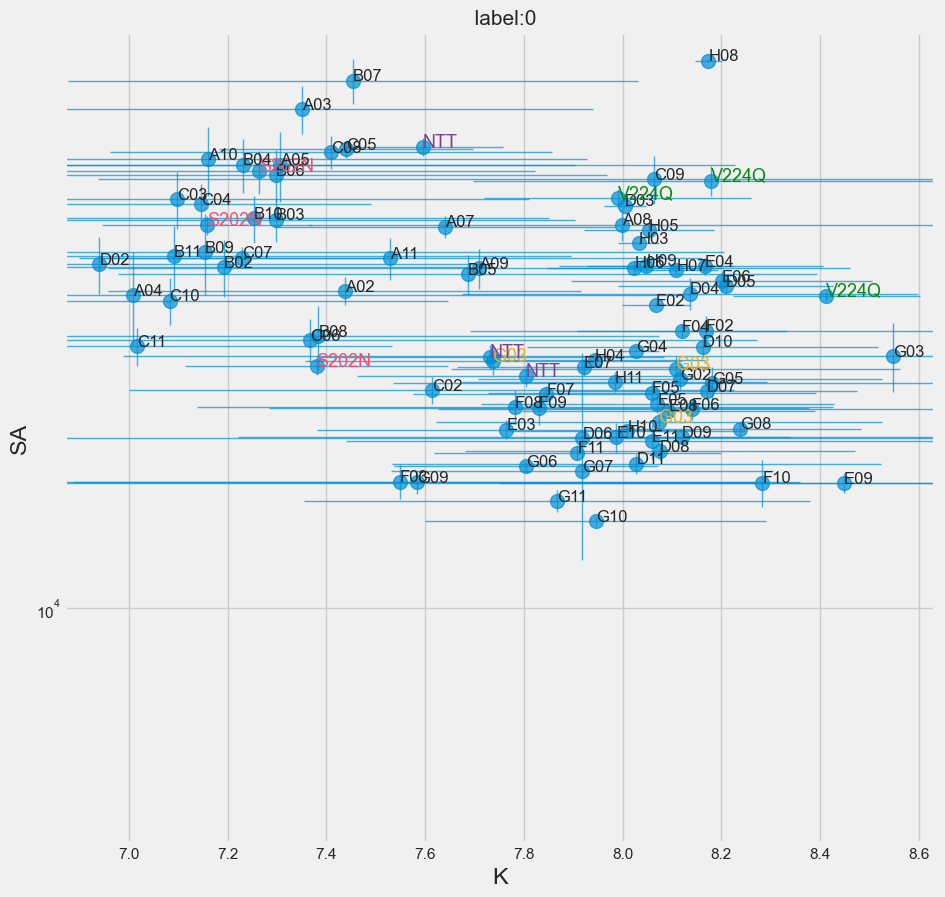

In [37]:
f = ph_an.plot_ebar(0)

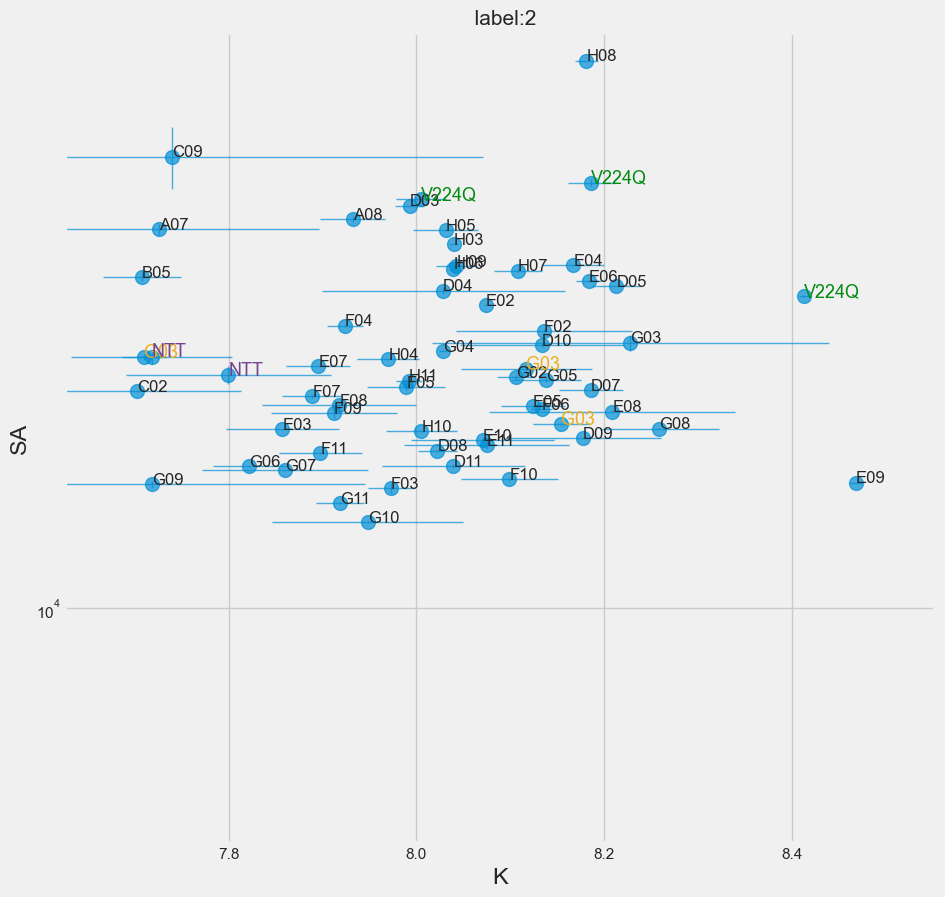

In [38]:
f = ph_an.plot_ebar(2, xmin=7.7, ymin=25)

/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  

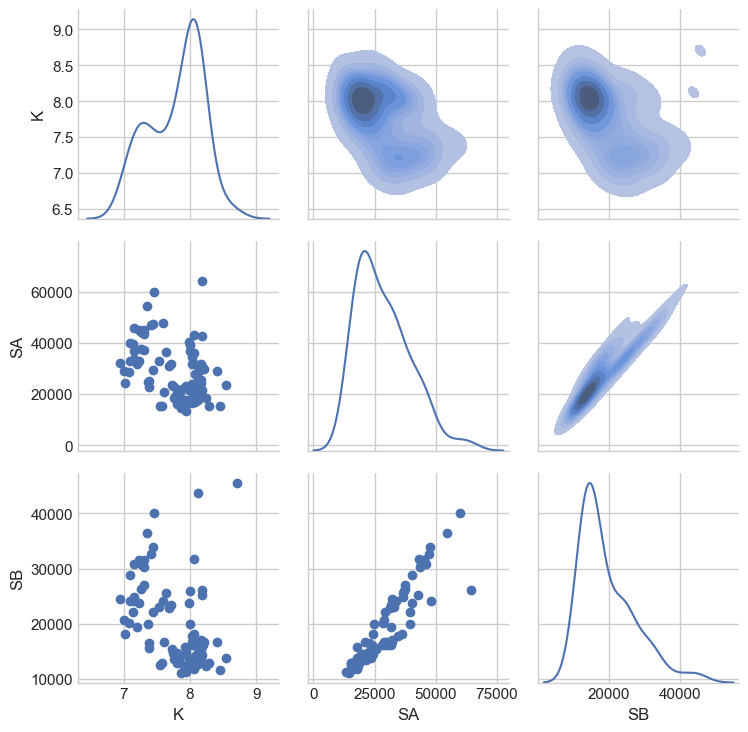

In [39]:
import seaborn as sb

sb.set_style("whitegrid")
g = sb.PairGrid(
    ph_an.fittings[0],
    x_vars=["K", "SA", "SB"],
    y_vars=["K", "SA", "SB"],
    # hue='SB',
    palette="Blues",
    diag_sharey=False,
)

g.map_lower(plt.scatter)
g.map_upper(sb.kdeplot, fill=True)
g.map_diag(sb.kdeplot)

Fit first (0) and second (1) dataset and global (2).

/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/home/dan/workspace/ClopHfit/.hatch/clophfit/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has be

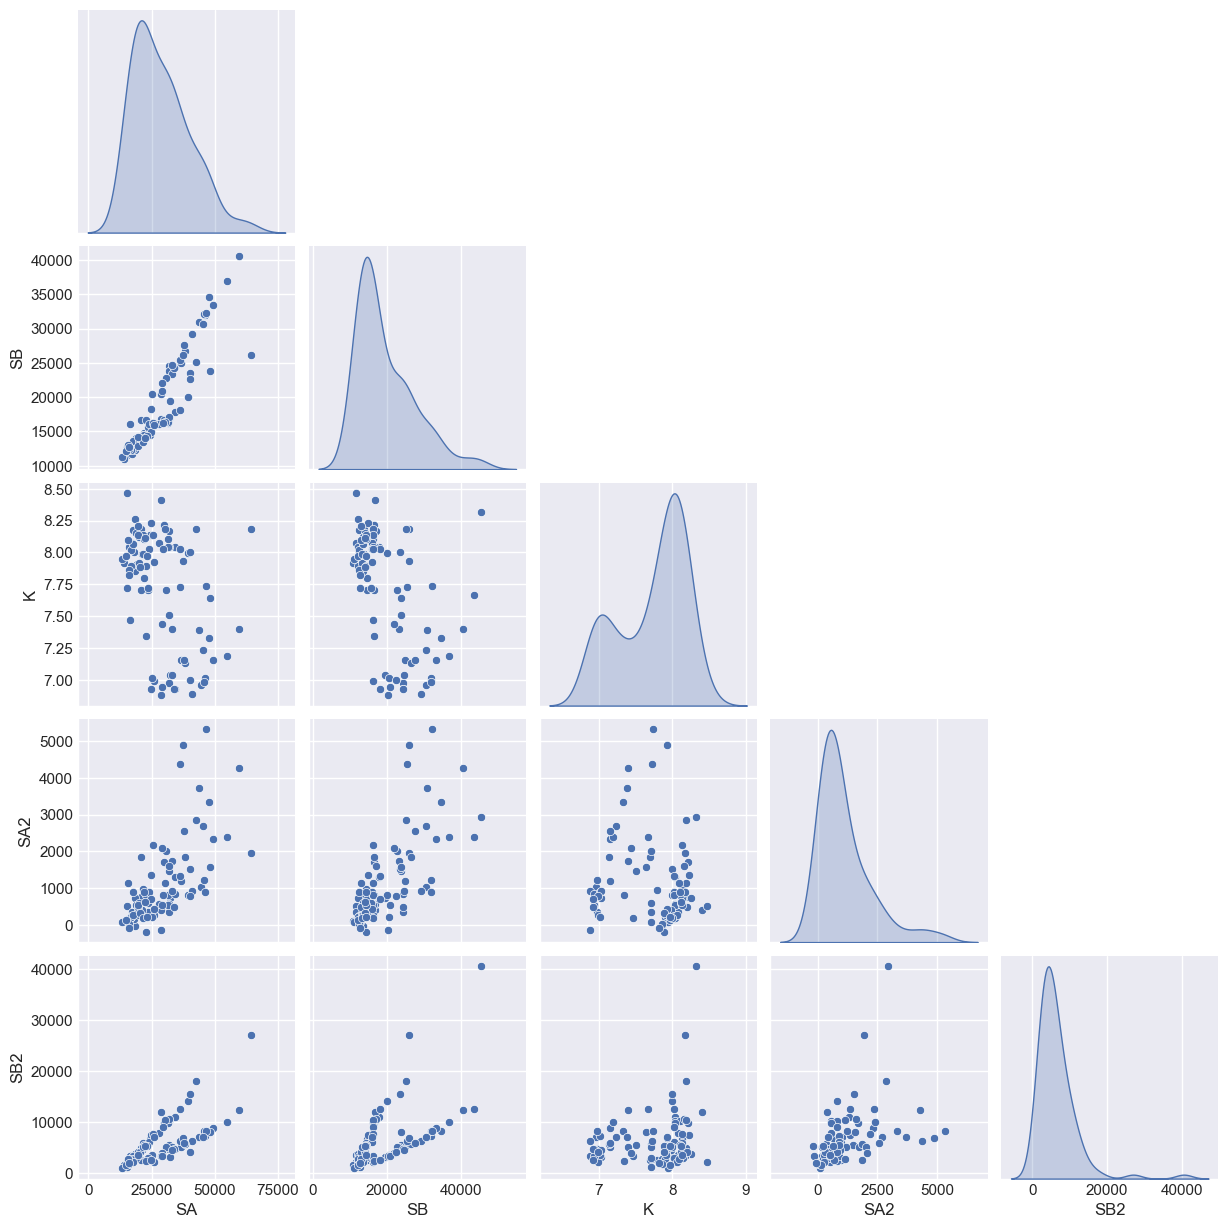

In [40]:
with sb.axes_style("darkgrid"):
    g = sb.pairplot(
        ph_an.fittings[2][["SA", "SB", "K", "SA2", "SB2"]],
        # hue='SB',
        palette="Reds",
        corner=True,
        diag_kind="kde",
    )

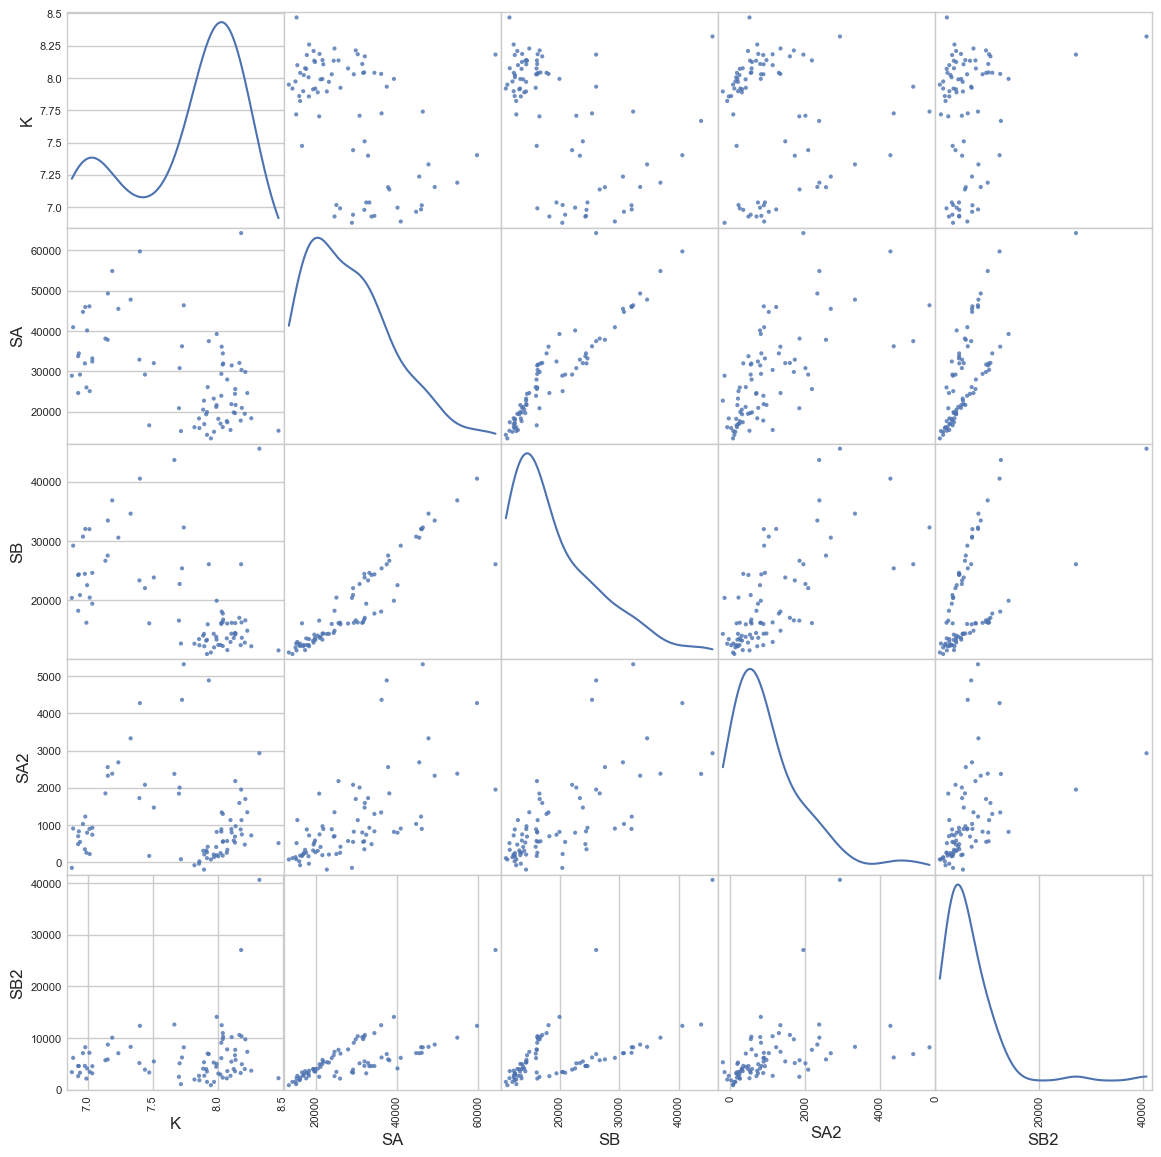

In [41]:
from pandas.plotting import scatter_matrix


def plot_matrix(tit, lb):
    df = tit.fittings[lb].loc[tit.keys_unk]
    try:
        f = scatter_matrix(
            df[["K", "SA", "SB", "SA2", "SB2"]],
            figsize=(14, 14),
            diagonal="kde",
            alpha=0.8,
        )
    except KeyError:
        f = scatter_matrix(
            df[["K", "SA", "SB"]], figsize=(10, 10), diagonal="kde", alpha=0.8
        )
    return f


f = plot_matrix(ph_an, 2)

### combining

In [42]:
res_unk = ph_an.fittings[1].loc[ph_an.keys_unk].sort_index()
res_unk["well"] = res_unk.index

<Figure size 2400x1400 with 0 Axes>

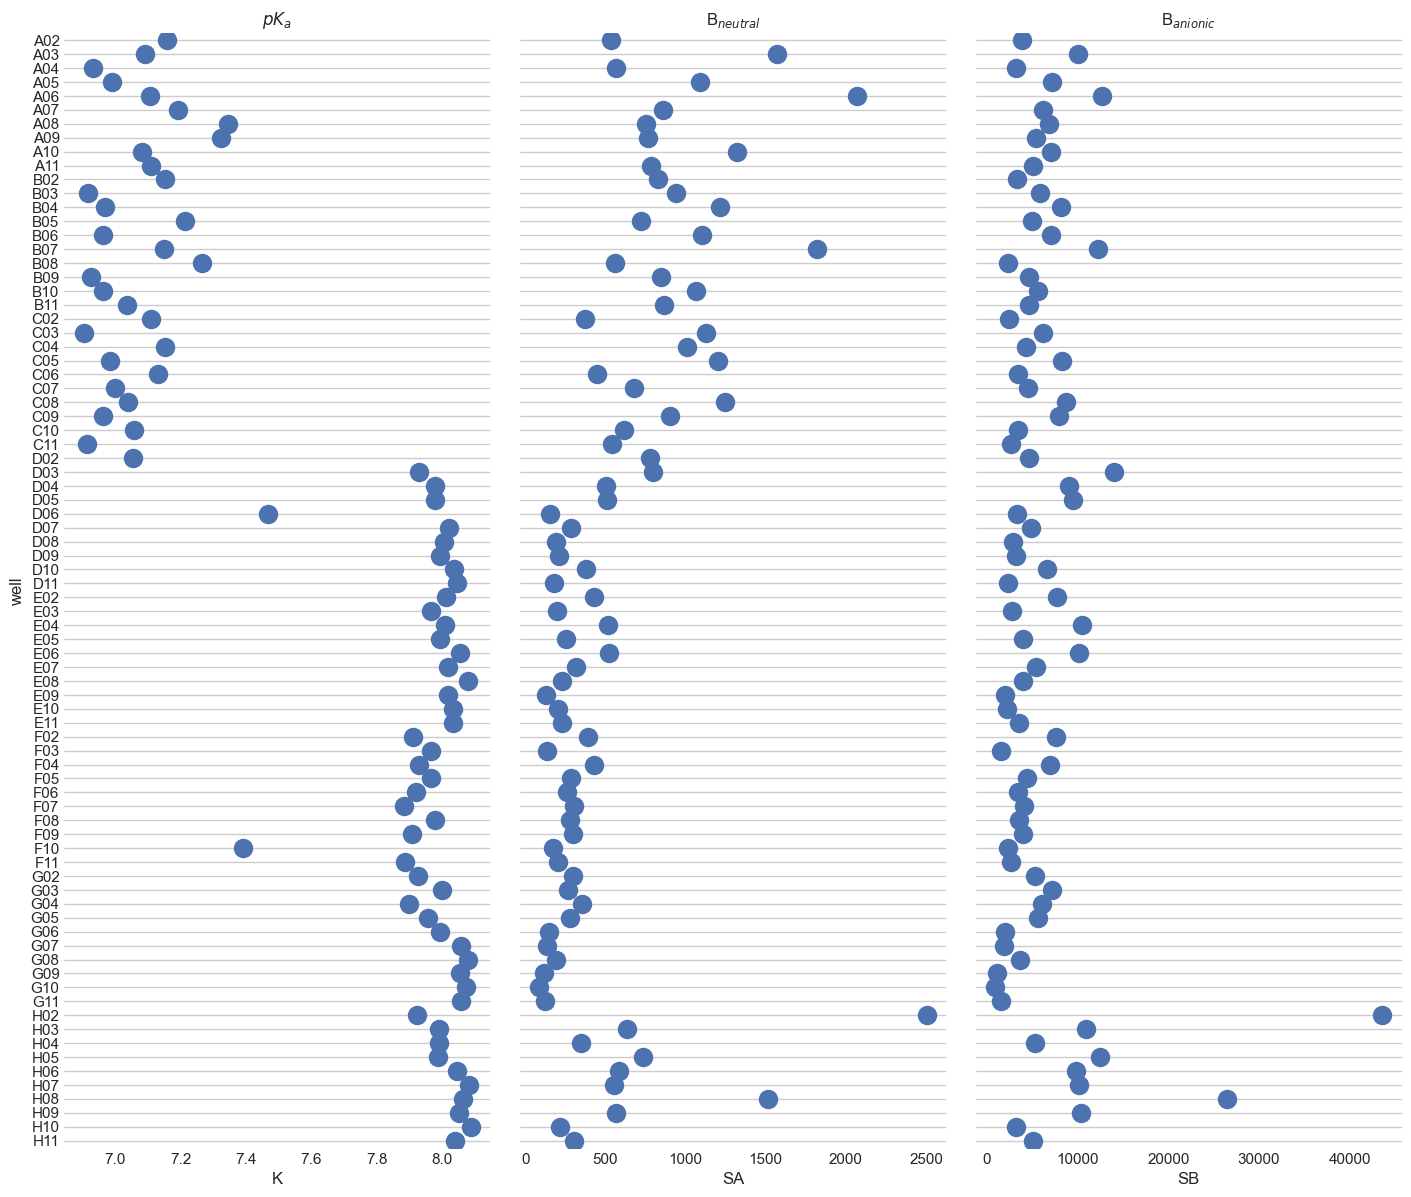

In [43]:
# g = sns.FacetGrid(data=res2, row='well',  margin_titles=True)
# g.map(plt.errorbar, 'K', range(1), xerr='sK', palette='Oranges_d') # x, y,
f = plt.figure(figsize=(24, 14))

# Make the PairGrid
g = sb.PairGrid(
    res_unk,
    x_vars=["K", "SA", "SB"],
    y_vars="well",
    height=12,
    aspect=0.4,
)


# Draw a dot plot using the stripplot function
g.map(sb.stripplot, size=14, orient="h", palette="Set2", edgecolor="gray")

# Use the same x axis limits on all columns and add better labels
# g.set(xlim=(0, 25), xlabel="Crashes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["$pK_a$", "B$_{neutral}$", "B$_{anionic}$"]


for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sb.despine(left=True, bottom=True)